[3 2 4 3 2 5 6 5 5 5 3 3 0 4 3 5 5 0 2 6 3 6 6 0 3 6 6 4 0 6 0 6 1 2 1 3 4
 2 4 3 4 6 0 4 0 5 3 2 4 5 2 5 3 2 5 5 2 6 6 4 3 2 5 3 0 2 0 1 3 5 2 3 2 4
 3 2 0 6 6 5 3 2 2 4 5 6 5 6 2 6 3 3 6 2 0 4 6 3 3 2 3 5 5 1 2 3 6 6 3 2 0
 0 6 0 2 5 3 6 0 3 0 3 0 5 2 2 1 5 4 5 3 2 6 2 5 5 5 2 0 5 2 4 0 6 2 4 3 4
 5 2 3 6 0 5 4 6 5 3 3 2 2 6 4 4 0 5 6 3 4 0 5 2 6 5 2 0 3 3 6 3 2 2 6 0 1
 2 6 5 2 4 2 1 2 3 1 6 3 4 2 0 4 3 2 3 2 5 6 3 6 6 1 5 0 5 3 1 0 4 6 2 6 6
 4 6 6 5 4 2 3 6 6 0 2 2 1 5 6 4 4 5 4 6 3 1 5 3 5 2 0 0 0 2 1 6 2 6 4 0 5
 4 4 6 2 6 5 1 2 4 6 6 6 5 2 5 5 2 6 2 4 6 5 6 5 1 3 3 2 0 2 3 2 3 1 0 2 6
 4 6 3 6 6 0 0 0 3 3 3 4 5 6 5 0 5 6 2 6 2 3 6 6 3 1 6 4 5 6 2 6 2 2 6 3 1
 6 3 3 0 0 2 3 3 0 2 6 2 6 4 5 3 4 5 0 0 4 5 6 5 4 3 6 5 3 6 2 3 4 4 4 2 5
 0 4 3 4 6 2 2 6 6 1 3 5 1 2 3 4 2 6 2 1 3 2 6 6 6 4 3 1 3 2 3 3 0 4 2 0 3
 0 6 2 3 1 3 6 1 3 1 6 0 2 1 6 6 5 2 3 4 4 5 1 5 4 0 6 1 3 6 6 2 0 2 2 2 4
 2 3 3 4 6 3 3 4 3 2 6 5 3 0 3 6 5 1 5 2 4 0 5 2 0 1 0 0 1 5 3 3 4 0 4 0]
['software, controller, so

C:\Users\Kaya\AppData\Local\Temp\ipykernel_21452\2204605777.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(XY[:, 0], XY[:, 1], c=topTopics, cmap=plt.cm.get_cmap('viridis', numTopics))


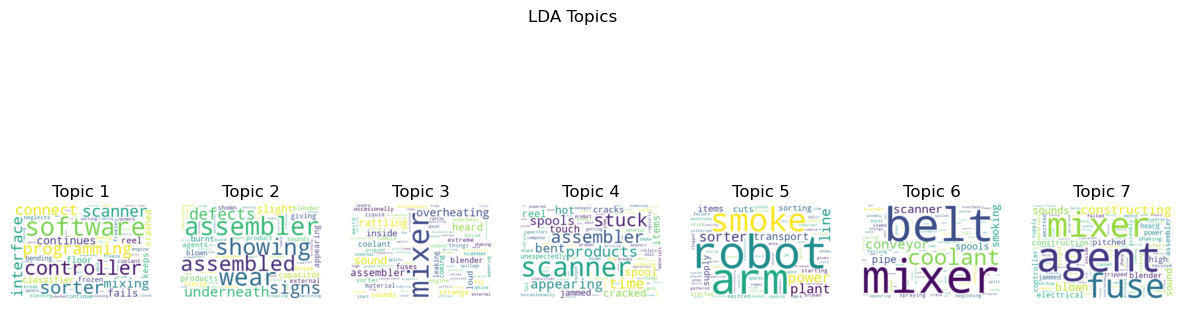

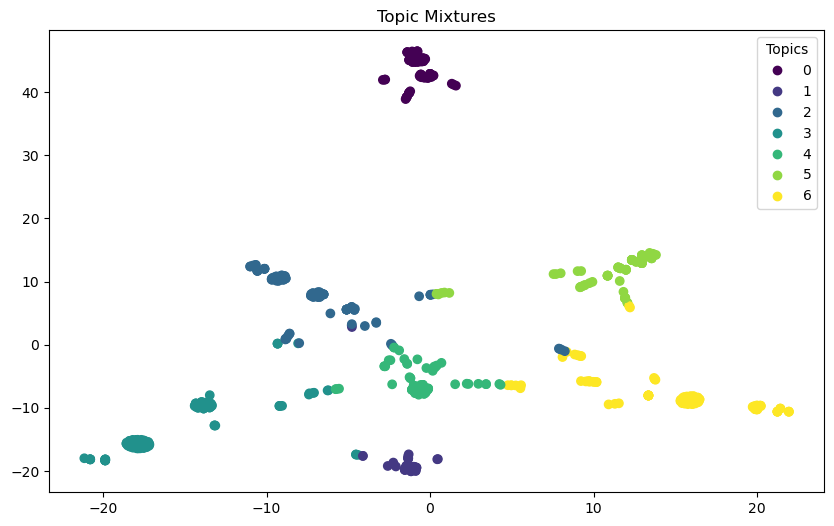

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Veriyi oku
data = pd.read_csv("factoryReports.csv")

# Metin verilerini al
textData = data["Description"].astype(str)

def preprocessText(textData):
    # Metni küçük harfe çevir
    cleanTextData = textData.str.lower()

    # Tokenize et
    vectorizer = CountVectorizer(stop_words="english")
    tokenized_documents = vectorizer.fit_transform(cleanTextData)

    return tokenized_documents, vectorizer  # vectorizer'ı da döndür

# Metin verilerini ön işle
documents, vectorizer = preprocessText(textData)

# LDA modelini oluştur
numTopics = 7
mdl = LatentDirichletAllocation(n_components=numTopics, random_state=42)
mdl.fit(documents)

# Her bir konunun kelime bulutunu çiz
numTopics = mdl.components_.shape[0]
fig, axs = plt.subplots(1, numTopics, figsize=(15, 5))
fig.suptitle("LDA Topics")

for i in range(numTopics):
    wordcloud = WordCloud(width=300, height=200, background_color='white').generate_from_frequencies(
        dict(zip(vectorizer.get_feature_names_out(), mdl.components_[i, :])))
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Topic {i + 1}')
    axs[i].axis('off')

# t-SNE ile belge konu karışımlarını görselleştir
XY = TSNE(n_components=2).fit_transform(mdl.transform(documents))
topTopics = np.argmax(mdl.transform(documents), axis=1)

print(topTopics)

# Her bir konu için en üst kelimeleri al
topWords = []
for i in range(numTopics):
    top_feature_idx = mdl.components_[i, :].argsort()[:-4:-1]
    top_words = [vectorizer.get_feature_names_out()[j] for j in top_feature_idx]
    topWords.append(', '.join(top_words))

print(topWords)

# "Topic Mixtures" başlıklı bir scatter plot görseli oluştur
plt.figure(figsize=(10, 6))
scatter = plt.scatter(XY[:, 0], XY[:, 1], c=topTopics, cmap=plt.cm.get_cmap('viridis', numTopics))
plt.title("Topic Mixtures")

# Renkli dairelerin yanında konuların en üst kelimelerini gösteren bir açıklama ekler
legend_labels = {i: topWords[i] for i in range(numTopics)}

print(legend_labels)
legend1 = plt.legend(*scatter.legend_elements(), title="Topics")
legend2 = plt.legend(legend_labels.values(), title="Top Words", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)


plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.show()
